In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("filtered_df2_A2.csv")

In [3]:
#data_df.info()

### One-Hot Encoding for categorical data

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])


In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
    'tenure_band_0-5',
    'tenure_band_11-15',
    'tenure_band_16 or more',
    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

### Algorithm 4 - Random Forest 

In [7]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [8]:
# divide the dataset into features (X) and the target variable (y)

X = data_df_encoded.drop(columns=['studied_credits'])  # drop target variable from the dataframe

y = data_df_encoded['studied_credits']        # id target variable 

In [9]:
# split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# create Random Forest with entrophy and 100 'trees' in the forest

# # test 1 - 100 trees (default)
#classifier_rf = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)

# test 2 - 150 trees
#classifier_rf = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)

# test 3 - 200 trees
# chang criterion to 'gini'
classifier_rf = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=0)

In [11]:
# fit the classifer to the dataset

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [12]:
# Make predictions on the test set

y_pred_rf = classifier_rf.predict(X_test)

In [13]:
# Calculate Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.6493506493506493


### Plotting the results of the test

C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


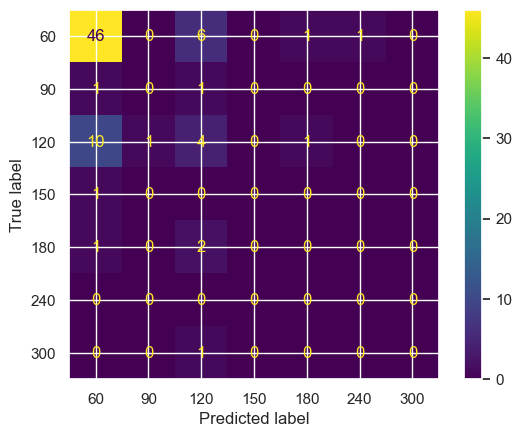

In [14]:
# Plot the confusion matrix

plot_confusion_matrix(classifier_rf, X_test, y_test)
plt.show()

In [15]:
# print the classification report to show model performance across different classes

y_pred = classifier_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          60       0.78      0.85      0.81        54
          90       0.00      0.00      0.00         2
         120       0.29      0.25      0.27        16
         150       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         3
         240       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         1

    accuracy                           0.65        77
   macro avg       0.15      0.16      0.15        77
weighted avg       0.61      0.65      0.63        77



C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sinea\Anaconda3\lib\site-packages\sklearn\metrics\_cla

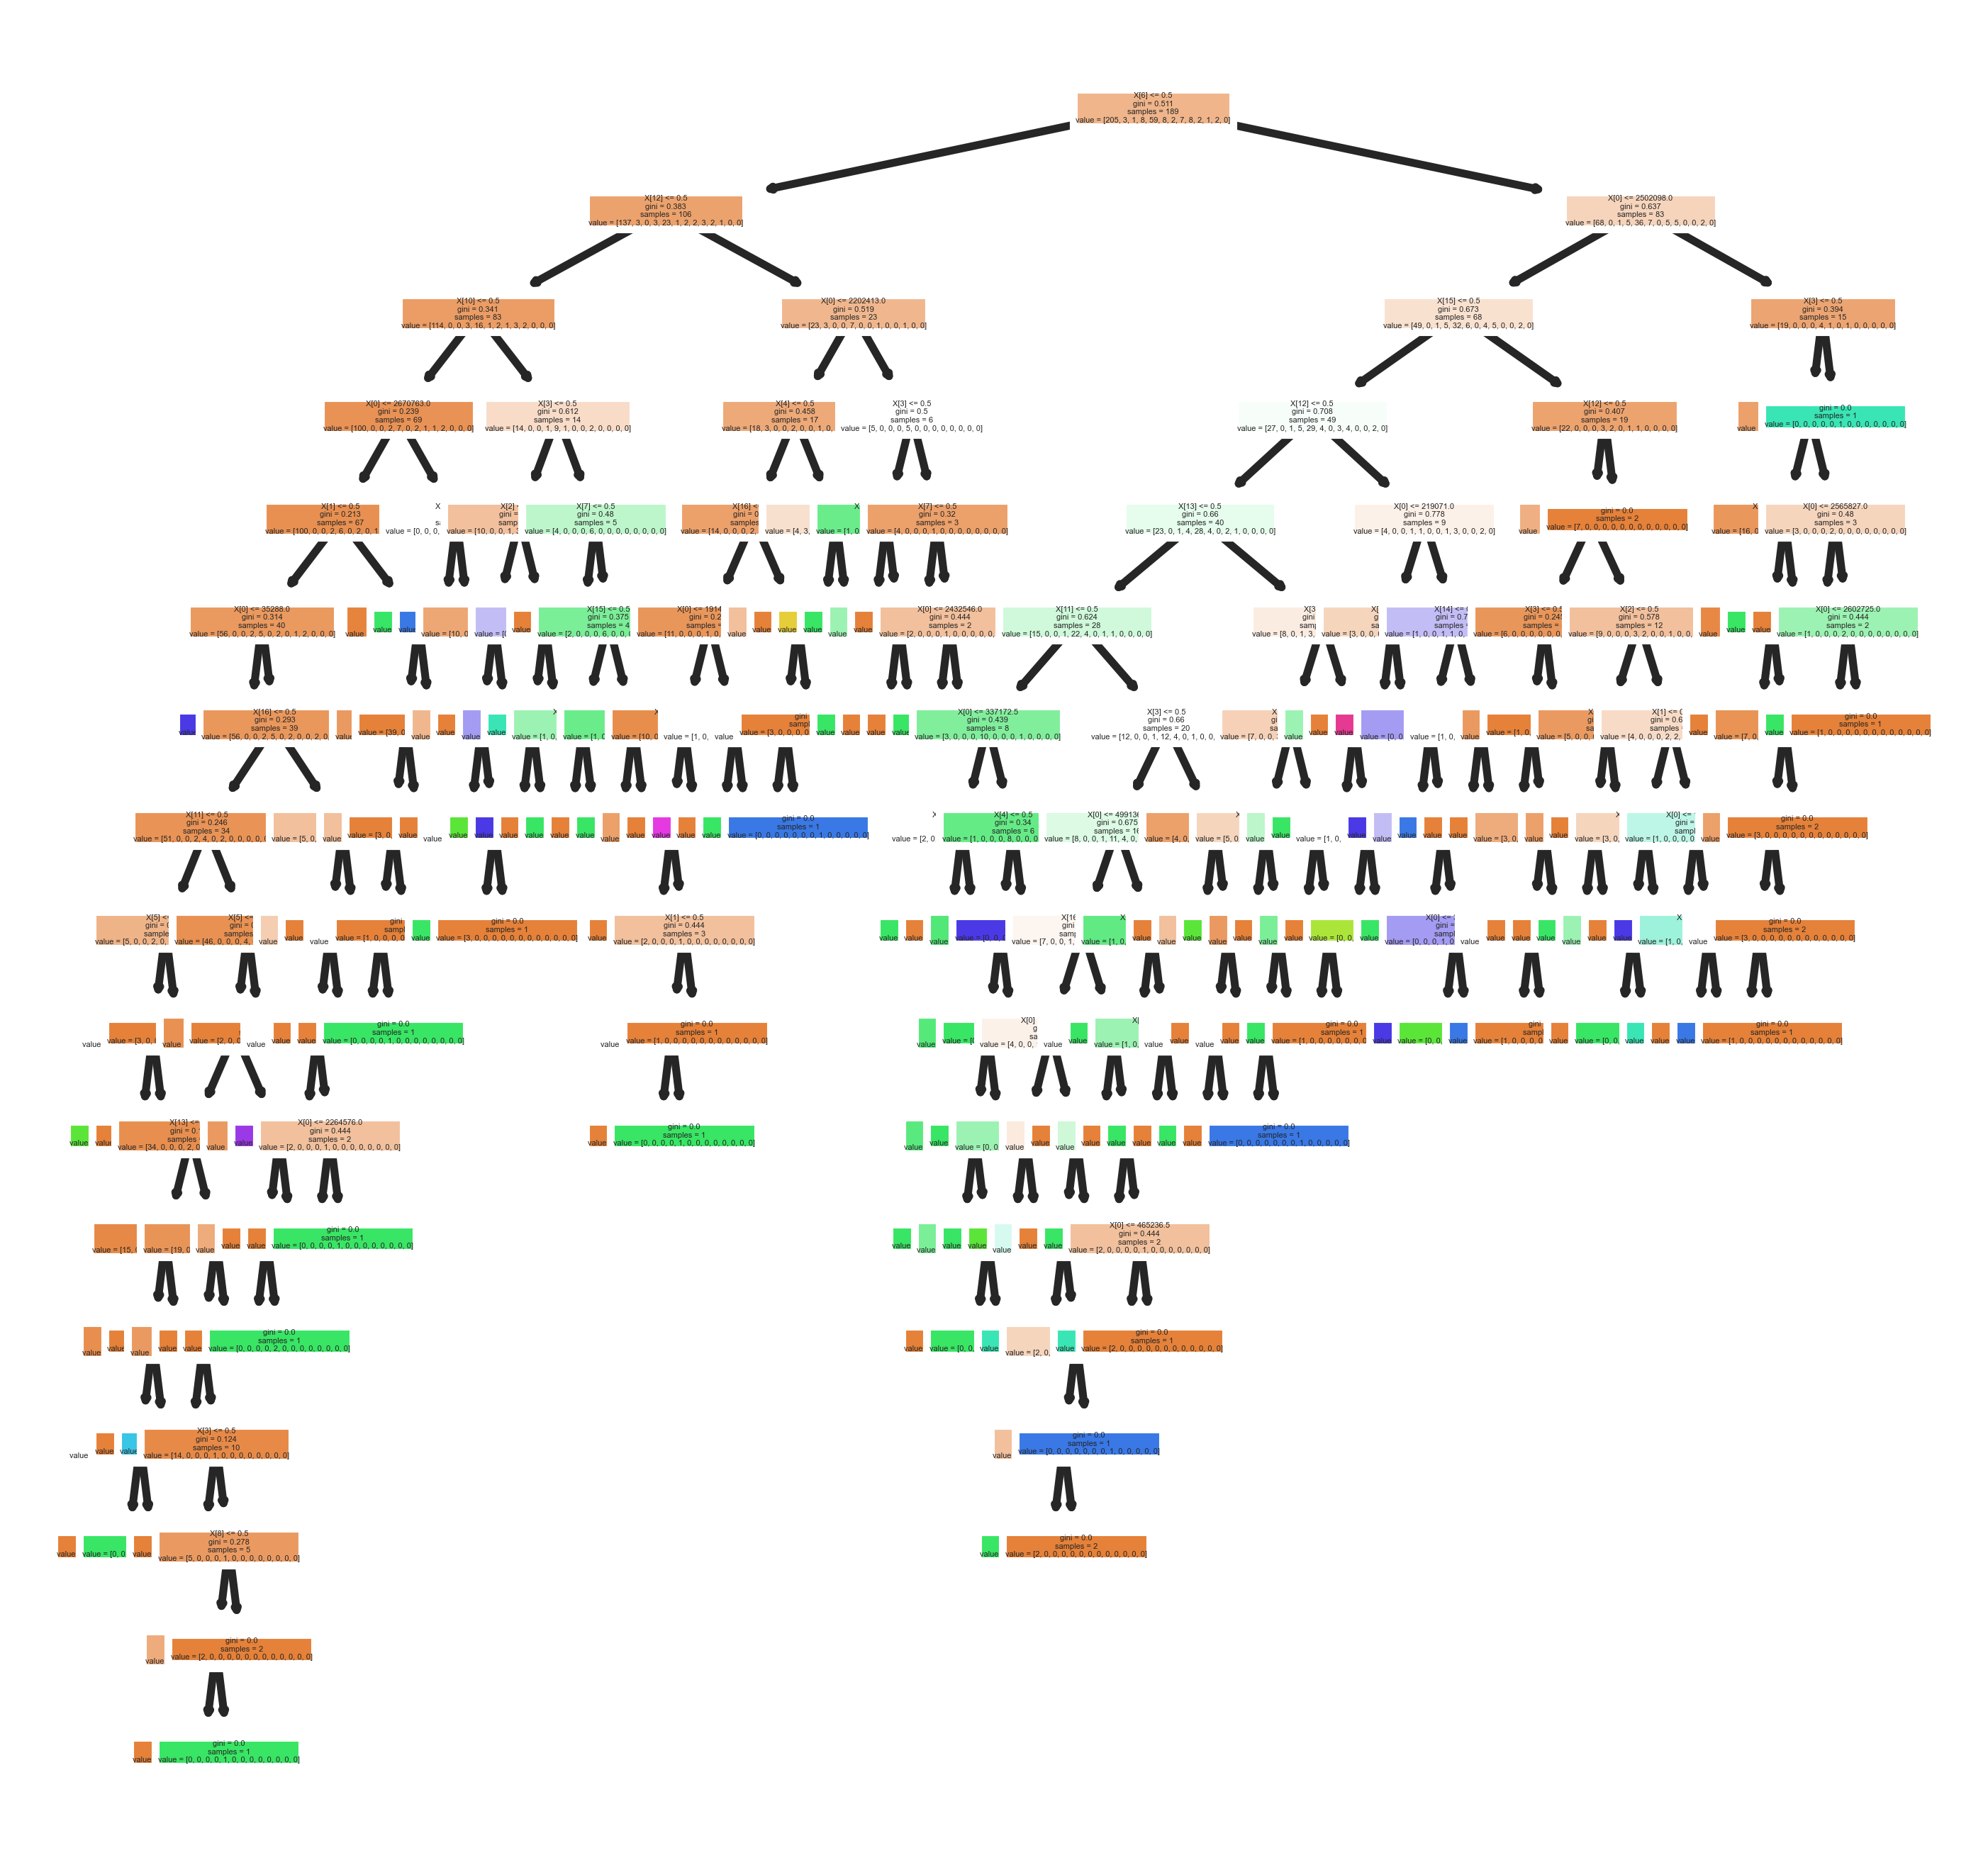

In [16]:
from sklearn import tree

# Pick a tree from the forest
tree_to_visualize = classifier_rf.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(tree_to_visualize,
               filled = True);
fig.savefig('Al_4_Random_Forest_Plot.png')

### References

1. Random Forests - Scikit learn - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
2. Random Forests - explained - https://medium.com/theboredhuman/random-forests-explained-intuitively-2cecb9e1a7b5
3. Confusion and Classification Reports - https://medium.com/@smuhabdullah/confusion-matrices-and-classification-reports-a-guide-to-evaluating-machine-learning-models-385496cf7cee
4. Plotting a Random Forest tree graph - https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn